In [12]:
import pandas as pd
features_modify=pd.read_csv("/Users/sima/Documents/Biasly/features.csv",encoding='latin-1')

In [117]:
X = features_modify.iloc[:, 4:14]

y = features_modify[['Final Label']].values.tolist()

sentences = features_modify.iloc[:, 3].values.tolist()

In [15]:
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.30)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(sentences_train[2])
print(X_train[2])

top_words = 5000
embedding_vecor_length = 100
maxlen = 500
max_review_length = 500
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Dropout(0.2))
model.add(LSTM(500))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=10, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

The privilege exists solely for the protection of the witness himself, and may not be claimed for the benefit of third parties.
[1, 424, 2776, 1357, 13, 1, 729, 2, 1, 327, 49, 5, 28, 17, 11, 1057, 13, 1, 730, 2, 544, 731]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 500)               1066000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 501       
Total params: 1,226,501
Trainable params: 1,226,501


In [19]:
# LSTM with the features
from keras.models import Model
import keras
# 
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras.models import Sequential
from keras.layers import concatenate
import numpy as np
from keras import initializers, regularizers, constraints, optimizers, layers
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.30, random_state=1)

sentences_train_meta, sentences_test_meta, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.30, random_state=1)



tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

top_words = 500
embedding_vecor_length = 500
maxlen = 500
max_review_length = 500
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
embedding_vecor_length = 500
data_meta = np.array((len(X), 10))

nlp_input = Input(shape=(500,), name='nlp_input')
meta_input = Input(shape=(10,), name='meta_input')
emb = Embedding(output_dim=500, input_dim=500, input_length=500)(nlp_input)
nlp_out = Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3, kernel_regularizer=regularizers.l2(0.01)))(emb)
x = concatenate([nlp_out, meta_input])
x = Dense(1, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(inputs=[nlp_input , meta_input], outputs=[x])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.fit([X_train,sentences_train_meta], y_train, batch_size=32, epochs=10)
# scores = model.evaluate([X_test,, y_test, verbose=0)
# print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
1114/1114 [==============================] - 147s 132ms/step - loss: 3.5598 - acc: 0.5018
Epoch 2/10
1114/1114 [==============================] - 162s 146ms/step - loss: 1.1573 - acc: 0.4910
Epoch 3/10
1114/1114 [==============================] - 157s 141ms/step - loss: 0.7423 - acc: 0.4910
Epoch 4/10
1114/1114 [==============================] - 140s 126ms/step - loss: 0.6965 - acc: 0.4910
Epoch 5/10
1114/1114 [==============================] - 145s 130ms/step - loss: 0.6934 - acc: 0.4910
Epoch 6/10
1114/1114 [==============================] - 140s 126ms/step - loss: 0.6932 - acc: 0.4910
Epoch 7/10
1114/1114 [==============================] - 131s 118ms/step - loss: 0.6931 - acc: 0.5090
Epoch 8/10
1114/1114 [==============================] - 129s 115ms/step - loss: 0.6931 - acc: 0.5090
Epoch 9/10
1114/1114 [==============================] - 142s 128ms/step - loss: 0.6931 - acc: 0.5090
Epoch 10/10
1114/1114 [==============================] - 146s 131ms/step - loss: 0.6931 - a

ValueError: The model expects 2 input arrays, but only received one array. Found: array with shape (478, 500)

In [30]:
s = (478,10)
ss = np.zeros(s)
ss.shape

(478, 10)

In [31]:
scores = model.evaluate([X_test,ss], y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 45.82%


In [35]:
# lets use minmaxscalar to transform the extra knwoledge then add it to LSTM
from keras.models import Model
import keras
# 
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras.models import Sequential
from keras.layers import concatenate
import numpy as np
from keras import initializers, regularizers, constraints, optimizers, layers
from sklearn.preprocessing import MinMaxScaler
# modifying the extra data
scaler = MinMaxScaler()
scaler.fit(X)
X_normalized = scaler.transform(X)


sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.30, random_state=1)

sentences_train_meta, sentences_test_meta, y_train_1, y_test_1 = train_test_split(X_normalized, y, test_size=0.30, random_state=1)

tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

top_words = 500
embedding_vecor_length = 500
maxlen = 500
max_review_length = 500
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
embedding_vecor_length = 500
data_meta = np.array((len(X), 10))
nlp_input = Input(shape=(500,), name='nlp_input')
meta_input = Input(shape=(10,), name='meta_input')
emb = Embedding(output_dim=500, input_dim=500, input_length=500)(nlp_input)
nlp_out = Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3, kernel_regularizer=regularizers.l2(0.01)))(emb)
x = concatenate([nlp_out, meta_input])
x = Dense(1, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(inputs=[nlp_input , meta_input], outputs=[x])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit([X_train,sentences_train_meta], y_train, batch_size=32, epochs=10)
scores = model.evaluate([X_test, ss], y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
1114/1114 [==============================] - 134s 120ms/step - loss: 3.3603 - acc: 0.5314
Epoch 2/10
1114/1114 [==============================] - 129s 116ms/step - loss: 1.1025 - acc: 0.6544
Epoch 3/10
1114/1114 [==============================] - 135s 121ms/step - loss: 0.6565 - acc: 0.7262
Epoch 4/10
1114/1114 [==============================] - 149s 134ms/step - loss: 0.5766 - acc: 0.7496
Epoch 5/10
1114/1114 [==============================] - 137s 123ms/step - loss: 0.5330 - acc: 0.7801
Epoch 6/10
1114/1114 [==============================] - 176s 158ms/step - loss: 0.5093 - acc: 0.8043
Epoch 7/10
1114/1114 [==============================] - 191s 171ms/step - loss: 0.4921 - acc: 0.8016
Epoch 8/10
1114/1114 [==============================] - 201s 180ms/step - loss: 0.4556 - acc: 0.8348
Epoch 9/10
1114/1114 [==============================] - 232s 208ms/step - loss: 0.4387 - acc: 0.8501
Epoch 10/10
1114/1114 [==============================] - 222s 200ms/step - loss: 0.4324 - a

In [40]:
# tfidf and sdg classifier
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
vectorizer = TfidfVectorizer()
XX = vectorizer.fit_transform(sentences)
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.30, random_state=1)
clf = linear_model.SGDClassifier(max_iter=20000, tol=1e-1)
# clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=5)
# predicted = clf.predict(X_test)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.63 (+/- 0.02)


/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarni

In [138]:
# here i will preprocess the normalized input
npm_tfidf = XX.todense()
combined_text_features=[]
for i in range(0,1592):
    Feat = list(X_normalized[i])
    TFIDF = np.array(npm_tfidf[i]).reshape(-1,).tolist()
    t = TFIDF + Feat
    combined_text_features.append(t)

In [144]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
# vectorizer = TfidfVectorizer()
# XX = vectorizer.fit_transform(sentences)
X_train, X_test, y_train, y_test = train_test_split(combined_text_features, y, test_size=0.30, random_state=1)
clf = linear_model.SGDClassifier(max_iter=20000, tol=1e-1)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=5)
predicted = clf.predict(X_test)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

average_precision = average_precision_score(y_test, predicted)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarni

Accuracy: 0.61 (+/- 0.04)
Average precision-recall score: 0.59


In [147]:
# lets try naive bayes
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
gnb = MultinomialNB()
vectorizer = TfidfVectorizer()
XX = vectorizer.fit_transform(sentences)
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.30, random_state=1)
# clf.fit(X_train, y_train)
scores = cross_val_score(gnb, X_train.toarray(), y_train, cv=5)
# predicted = clf.predict(X_test)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.63 (+/- 0.04)


/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [187]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
# vectorizer = TfidfVectorizer()
# XX = vectorizer.fit_transform(sentences)
gnb = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(combined_text_features, y, test_size=0.30, random_state=1)
# clf = linear_model.SGDClassifier(max_iter=20000, tol=1e-1)
gnb.fit(X_train, y_train)
scores = cross_val_score(gnb, X_train, y_train, cv=5)
predicted = clf.predict(X_test)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

average_precision = average_precision_score(y_test, predicted)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarni

Accuracy: 0.58 (+/- 0.08)
Average precision-recall score: 0.54


In [149]:
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
# vectorizer = TfidfVectorizer()
# XX = vectorizer.fit_transform(sentences)
clf = SVC(gamma='auto')
X_train, X_test, y_train, y_test = train_test_split(combined_text_features, y, test_size=0.30, random_state=1)
# clf = linear_model.SGDClassifier(max_iter=20000, tol=1e-1)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=5)
predicted = clf.predict(X_test)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

average_precision = average_precision_score(y_test, predicted)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))



/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarni

Accuracy: 0.51 (+/- 0.00)
Average precision-recall score: 0.54


In [150]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
clf = SVC(gamma='auto')
vectorizer = TfidfVectorizer()
XX = vectorizer.fit_transform(sentences)
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.30, random_state=1)
# clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train.toarray(), y_train, cv=5)
# predicted = clf.predict(X_test)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarni

Accuracy: 0.51 (+/- 0.00)


In [154]:
# xgboost
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
LR = LogisticRegression(penalty='l1',C=0.1)
vectorizer = TfidfVectorizer()
XX = vectorizer.fit_transform(sentences)
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.30, random_state=1)
LR.fit(X_train, y_train)
scores = cross_val_score(LR, X_train.toarray(), y_train, cv=5)
predicted = LR.predict(X_test)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarni

Accuracy: 0.51 (+/- 0.00)


In [156]:
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
# vectorizer = TfidfVectorizer()
# XX = vectorizer.fit_transform(sentences)
LR = LogisticRegression(penalty='l1',C=0.1)
X_train, X_test, y_train, y_test = train_test_split(combined_text_features, y, test_size=0.30, random_state=1)
# clf = linear_model.SGDClassifier(max_iter=20000, tol=1e-1)
LR.fit(X_train, y_train)
scores = cross_val_score(LR, X_train, y_train, cv=5)
predicted = LR.predict(X_test)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

average_precision = average_precision_score(y_test, predicted)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))


/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarni

Accuracy: 0.51 (+/- 0.00)
Average precision-recall score: 0.54


In [161]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new = SelectKBest(chi2, k=5).fit_transform(X, y)
X_new.shape

(1592, 5)

In [164]:
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

/Users/sima/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[ 0.09873356  0.1297592   0.00454501  0.11050467  0.07030426  0.12670164
  0.10907707  0.17096958  0.13566476  0.04374023]


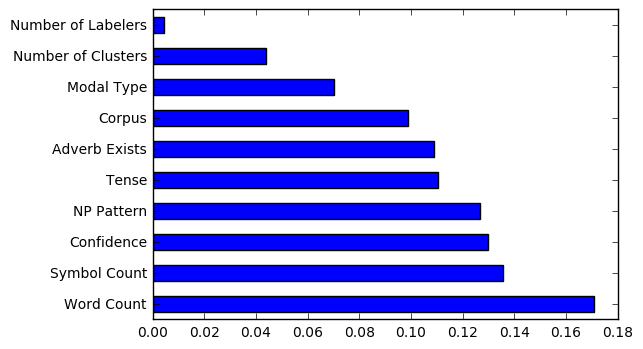

In [170]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [173]:
X.drop(["Number of Labelers", "Number of Clusters","Modal Type","Corpus","Adverb Exists"],axis = 1)

,Confidence,Tense,NP Pattern,Word Count,Symbol Count
0,0.6549,1.0,1,38,8
1,0.6704,1.0,4,17,5
2,0.6308,1.0,12,13,5
3,0.6566,2.0,2,42,5
4,1.0000,3.0,7,26,7
5,0.6519,7.0,2,59,34
6,1.0000,1.0,1,26,7
7,0.6800,3.0,1,42,11
8,0.6924,3.0,1,15,4
9,0.7037,1.0,4,25,4


In [177]:
X_features = X.values.tolist()

In [185]:
npm_tfidf = XX.todense()
combined_text_features=[]
for i in range(0,1592):
    Feat = X_features[i]
    TFIDF = np.array(npm_tfidf[i]).reshape(-1,).tolist()
    t = TFIDF + Feat
    combined_text_features.append(t)

In [186]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
# vectorizer = TfidfVectorizer()
# XX = vectorizer.fit_transform(sentences)
X_train, X_test, y_train, y_test = train_test_split(combined_text_features, y, test_size=0.30, random_state=1)
clf = linear_model.SGDClassifier(max_iter=20000, tol=1e-1)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=5)
predicted = clf.predict(X_test)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

average_precision = average_precision_score(y_test, predicted)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sima/sklearn/utils/validation.py:578: DataConversionWarni

Accuracy: 0.52 (+/- 0.05)
Average precision-recall score: 0.54


In [184]:
len(X_train[0])

8538